In [51]:
import torch

In [52]:
import pandas as pd

df=pd.read_csv("50_Startups.csv")
print(df.info)

<bound method DataFrame.info of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida

In [22]:
print(df.shape)

(50, 5)


In [39]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [40]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [41]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [43]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

le=LabelEncoder()
df['State']=le.fit_transform(df['State'])
air_map = dict(zip(le.classes_, range(len(le.classes_))))
print(air_map)

{'California': 0, 'Florida': 1, 'New York': 2}


In [54]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [55]:
sc=MinMaxScaler()
dfnew=sc.fit_transform(df.iloc[:,:-1])

In [56]:
df1=pd.DataFrame(dfnew,columns=['R&D Spend', 'Administration', 'Marketing Spend', 'State'])

In [57]:
df1

,R&D Spend,Administration,Marketing Spend,State
0,1.000000,0.651744,1.000000,1.0
1,0.983359,0.761972,0.940893,0.0
2,0.927985,0.379579,0.864664,0.5
3,0.873136,0.512998,0.812235,1.0
4,0.859438,0.305328,0.776136,0.5
5,0.797566,0.369448,0.769126,1.0
6,0.814128,0.730161,0.270710,0.0
7,0.788018,0.717457,0.686493,0.5
8,0.729018,0.741733,0.660500,1.0
9,0.745906,0.436929,0.646443,0.0


In [58]:
df1['Profit']=df['Profit']

In [59]:
df1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,1.000000,0.651744,1.000000,1.0,192261.83
1,0.983359,0.761972,0.940893,0.0,191792.06
2,0.927985,0.379579,0.864664,0.5,191050.39
3,0.873136,0.512998,0.812235,1.0,182901.99
4,0.859438,0.305328,0.776136,0.5,166187.94
5,0.797566,0.369448,0.769126,1.0,156991.12
6,0.814128,0.730161,0.270710,0.0,156122.51
7,0.788018,0.717457,0.686493,0.5,155752.60
8,0.729018,0.741733,0.660500,1.0,152211.77
9,0.745906,0.436929,0.646443,0.0,149759.96


In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

x=df1.iloc[:,:-1]
print(x)
y=df1.iloc[:,-1]
print(y)

    R&D Spend  Administration  Marketing Spend  State
0    1.000000        0.651744         1.000000    1.0
1    0.983359        0.761972         0.940893    0.0
2    0.927985        0.379579         0.864664    0.5
3    0.873136        0.512998         0.812235    1.0
4    0.859438        0.305328         0.776136    0.5
5    0.797566        0.369448         0.769126    1.0
6    0.814128        0.730161         0.270710    0.0
7    0.788018        0.717457         0.686493    0.5
8    0.729018        0.741733         0.660500    1.0
9    0.745906        0.436929         0.646443    0.0
10   0.616351        0.451506         0.485733    0.5
11   0.608845        0.308364         0.529362    0.0
12   0.567670        0.578836         0.529563    0.5
13   0.556352        0.641066         0.535552    0.0
14   0.725394        0.801327         0.543708    0.5
15   0.692617        0.543030         0.554864    1.0
16   0.471808        0.535270         0.560312    0.0
17   0.572468        0.71401

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [66]:
x_train_tensor=torch.tensor(x_train.values,dtype=torch.float32)

In [67]:
x_train_tensor

tensor([[0.5677, 0.5788, 0.5296, 0.5000],
        [0.8594, 0.3053, 0.7761, 0.5000],
        [0.2665, 0.0000, 0.4176, 0.0000],
        [0.7290, 0.7417, 0.6605, 1.0000],
        [0.8731, 0.5130, 0.8122, 1.0000],
        [0.8141, 0.7302, 0.2707, 0.0000],
        [0.1687, 0.2545, 0.3486, 0.5000],
        [0.0080, 0.4913, 0.6298, 0.5000],
        [0.0000, 0.6405, 0.0000, 0.0000],
        [0.6926, 0.5430, 0.5549, 1.0000],
        [0.7459, 0.4369, 0.6464, 0.0000],
        [0.4718, 0.5353, 0.5603, 0.0000],
        [0.4659, 0.3654, 0.2980, 1.0000],
        [0.2808, 0.8101, 0.4468, 0.0000],
        [0.3697, 0.7721, 0.1870, 1.0000],
        [1.0000, 0.6517, 1.0000, 1.0000],
        [0.1341, 0.7881, 0.0601, 0.0000],
        [0.4361, 0.5830, 0.7486, 1.0000],
        [0.3356, 0.3941, 0.4549, 0.5000],
        [0.7976, 0.3694, 0.7691, 1.0000],
        [0.3968, 0.7746, 0.2271, 1.0000],
        [0.6088, 0.3084, 0.5294, 0.0000],
        [0.1734, 0.5768, 0.4263, 0.5000],
        [0.9834, 0.7620, 0.9409, 0

In [70]:
x_test_tensor=torch.tensor(x_test.values,dtype=torch.float32)
y_train_tensor=torch.tensor(y_train.values,dtype=torch.float32).view(-1,1)
y_test_tensor=torch.tensor(y_test.values,dtype=torch.float32).view(-1,1)

In [81]:
class LinearReg(nn.Module):
    def __init__(self,input):
        super(LinearReg,self).__init__()
        self.linear=nn.Linear(input,1)
        
    def forward(self,x):
        return self.linear(x)
    

input=x_train.shape[1]
model=LinearReg(input)
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(),lr=0.3)
epochs=500
train_losses=[]
test_losses=[]
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred=model(x_train_tensor)
    train_loss=criterion(y_pred,y_train_tensor)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())
    model.eval()
    with torch.no_grad():
        test_outputs=model(x_test_tensor)
        test_loss=criterion(test_outputs,y_test_tensor)
        test_losses.append(test_loss.item())
print(test_losses)
print(train_losses)


[1578144256.0, 379894816.0, 386939648.0, 314699776.0, 278355424.0, 243458512.0, 215364016.0, 191948000.0, 172748720.0, 157103920.0, 144490944.0, 134450688.0, 126588848.0, 120565224.0, 116087464.0, 112903848.0, 110798016.0, 109584592.0, 109104488.0, 109221528.0, 109819584.0, 110799552.0, 112077168.0, 113580816.0, 115250288.0, 117034736.0, 118891328.0, 120784528.0, 122684968.0, 124568256.0, 126414608.0, 128208128.0, 129936192.0, 131588840.0, 133158528.0, 134639904.0, 136029280.0, 137324096.0, 138523376.0, 139626688.0, 140635168.0, 141549728.0, 142372592.0, 143106000.0, 143752496.0, 144315280.0, 144797280.0, 145201936.0, 145532448.0, 145792576.0, 145985488.0, 146114720.0, 146183536.0, 146195408.0, 146153696.0, 146061424.0, 145921616.0, 145737376.0, 145511840.0, 145247296.0, 144946944.0, 144612816.0, 144247824.0, 143854032.0, 143433680.0, 142988928.0, 142521824.0, 142034208.0, 141527968.0, 141004720.0, 140466208.0, 139913920.0, 139349088.0, 138773296.0, 138187776.0, 137593728.0, 136992288.

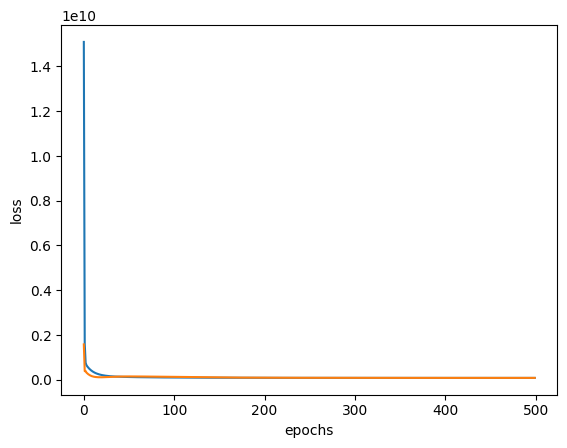

In [82]:
import matplotlib.pyplot as plt
plt.plot(train_losses,label='Training')
plt.plot(test_losses,label='Testing')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
print("Weight is ",model.linear.weight)
print("Bias is ",model.linear.bias)